# Dataset Introduction

This dataset contains information about students’ social media usage and addiction behavior. It includes 705 student records with details such as age, gender, daily social media usage, sleep hours, mental health score, academic impact, relationship status, and preferred social media platforms.

The dataset is used to study how social media usage affects students’ addiction levels, academic performance, and mental well-being. The addiction score was converted into Low, Medium, and High addiction levels to support classification-based analysis.

### Importing Libraries

In [196]:
# Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [197]:
# Load the dataset
df = pd.read_csv("Students Social Media Addiction.csv")
# Create a copy of the dataset to preserve the original
df_copy = df.copy()

In [198]:
# Show the top rows
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [199]:
#  Show the bottom rows
df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


## Data Cleaning

In [200]:
# Check for missing values in each column
print('\nMissing Values:')
print(df.isnull().sum())


Missing Values:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


In [201]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print('Duplicate Rows:', duplicates)

Duplicate Rows: 0


In [202]:
# Convert 'Gender' column to numeric (Female = 0, Male = 1)
df['Gender'] = df['Gender'].str.lower().map({'female': 0, 'male': 1})

In [203]:
# Check unique values in 'Affects_Academic_Performance' before encoding
print("Unique values in Affects_Academic_Performance:", df['Affects_Academic_Performance'].unique())

Unique values in Affects_Academic_Performance: ['Yes' 'No']


In [204]:
# Convert 'Affects_Academic_Performance' to numeric (Yes = 1, No = 0)
df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].str.lower().map({'yes': 1, 'no': 0})

In [205]:
# One-hot encode categorical variables (drop_first=True avoids dummy variable trap)
df = pd.get_dummies(df, columns=['Academic_Level', 'Country', 'Most_Used_Platform', 'Relationship_Status'], drop_first=True)

In [206]:
# Convert all columns to integer type
df = df.astype(int)

In [207]:
# Preview the dataset after transformation
df.head()

,Student_ID,Age,Gender,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Academic_Level_High School,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
0,1,19,0,5,1,6,6,3,8,0,...,0,0,0,0,0,0,0,0,1,0
1,2,22,1,2,0,7,8,0,3,0,...,0,0,0,1,0,0,0,0,0,1
2,3,20,0,6,1,5,5,4,9,0,...,0,0,1,0,0,0,0,0,0,0
3,4,18,1,3,0,7,7,1,4,1,...,0,0,0,0,0,0,0,1,0,1
4,5,21,1,4,1,6,6,2,7,0,...,0,0,0,0,0,0,0,0,1,0


##  Exploratory Data Analysis (EDA)


In [208]:
# Check the shape of the dataset (rows, columns)
print('Dataset Shape:', df.shape)

Dataset Shape: (705, 133)


In [209]:
# Get detailed information about column names, data types, and non-null counts
print('\nDataset Info:')
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 133 entries, Student_ID to Relationship_Status_Single
dtypes: int64(133)
memory usage: 732.7 KB
None


In [210]:
# Generate summary statistics for numerical columns
print('\nStatistical Summary:')
print(df.describe())




Statistical Summary:
       Student_ID         Age      Gender  Avg_Daily_Usage_Hours  \
count  705.000000  705.000000  705.000000             705.000000   
mean   353.000000   20.659574    0.499291               4.441135   
std    203.660256    1.399217    0.500354               1.292355   
min      1.000000   18.000000    0.000000               1.000000   
25%    177.000000   19.000000    0.000000               4.000000   
50%    353.000000   21.000000    0.000000               4.000000   
75%    529.000000   22.000000    1.000000               5.000000   
max    705.000000   24.000000    1.000000               8.000000   

       Affects_Academic_Performance  Sleep_Hours_Per_Night  \
count                    705.000000             705.000000   
mean                       0.642553               6.418440   
std                        0.479588               1.167481   
min                        0.000000               3.000000   
25%                        0.000000               6.000

In [211]:
# Drop 'Student_ID' since it's just an identifier and not useful for analysis
df.drop(columns=['Student_ID'], inplace=True)

In [212]:
df['Addicted_Score'].unique()

array([8, 3, 9, 4, 7, 2, 5, 6])

In [213]:
# Check unique values in 'Addicted_Score' to understand its scale
print("Unique values in Addicted_Score:", df['Addicted_Score'].unique())

Unique values in Addicted_Score: [8 3 9 4 7 2 5 6]


In [214]:
# Define function to categorize addiction levels
def addiction_level(score):
    if score <= 3:
        return 0   # Low
    elif score <= 6:
        return 1   # Medium
    else:
        return 2   # High

# Apply function and drop original score column
df['Addiction_Level'] = df['Addicted_Score'].apply(addiction_level)
df.drop(columns=['Addicted_Score'], inplace=True)

In [215]:
# Check distribution of addiction levels
print("Addiction Level Counts:")
print(df['Addiction_Level'].value_counts())

Addiction Level Counts:
Addiction_Level
2    408
1    280
0     17
Name: count, dtype: int64


## Outlier Detection

In [216]:
# function to create polished boxplots to detect outliers
def plot_box(variable, title, color_scheme):
    sns.boxplot(
        x=df[variable],
        medianprops=dict(color=color_scheme['median'], linewidth=2),
        boxprops=dict(facecolor=color_scheme['box'], edgecolor=color_scheme['edge'], linewidth=2),
        whiskerprops=dict(color=color_scheme['whisker'], linewidth=2),
        capprops=dict(color=color_scheme['cap'], linewidth=2)
    )
    plt.title(title, fontsize=14)
    plt.xlabel(title, fontsize=12)
    plt.tight_layout()
    plt.show()

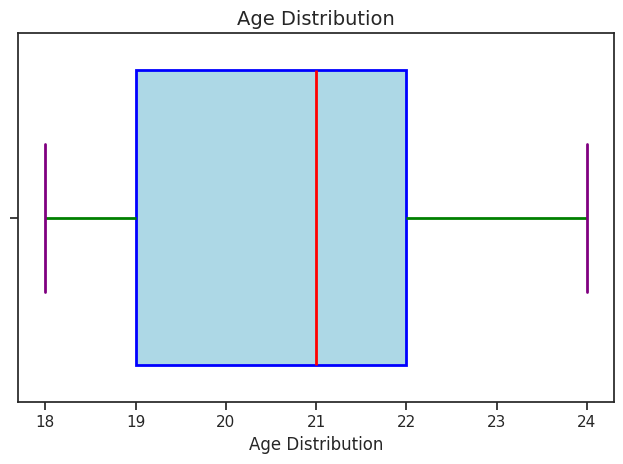

In [217]:
# Plot Age Distribution
plot_box("Age", "Age Distribution",
         {"median":"red","box":"lightblue","edge":"blue","whisker":"green","cap":"purple"})


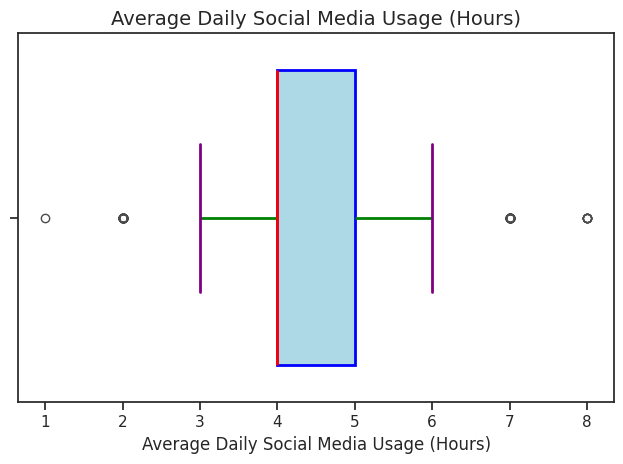

In [218]:
# Plot Average Daily Usage Hours
plot_box("Avg_Daily_Usage_Hours", "Average Daily Social Media Usage (Hours)",
         {"median":"red","box":"lightblue","edge":"blue","whisker":"green","cap":"purple"})

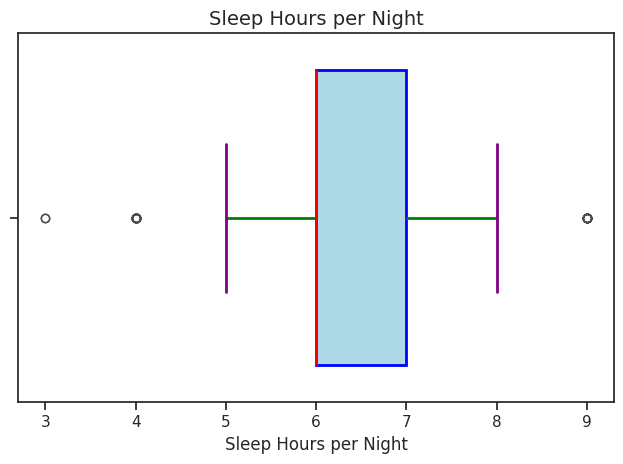

In [219]:
# Plot Sleep Hours per Night
plot_box("Sleep_Hours_Per_Night", "Sleep Hours per Night",
         {"median":"red","box":"lightblue","edge":"blue","whisker":"green","cap":"purple"})

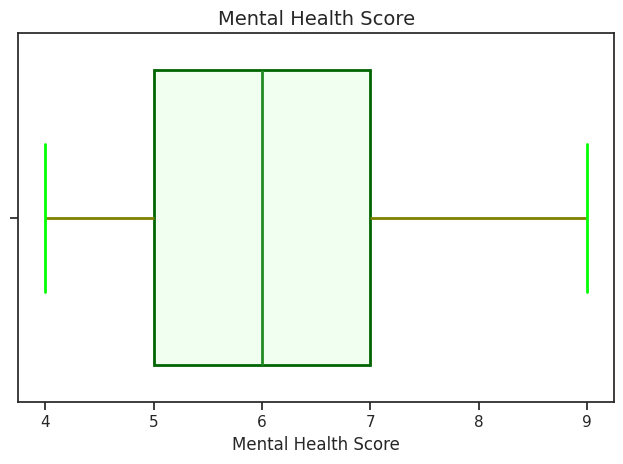

In [220]:
# Plot Mental Health Score
plot_box("Mental_Health_Score", "Mental Health Score",
         {"median":"forestgreen","box":"honeydew","edge":"darkgreen","whisker":"olive","cap":"lime"})


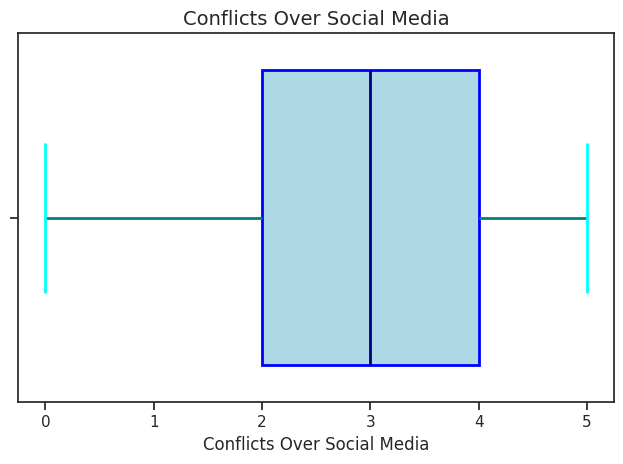

In [221]:
# Plot Conflicts Over Social Media
plot_box("Conflicts_Over_Social_Media", "Conflicts Over Social Media",
         {"median":"navy","box":"lightblue","edge":"blue","whisker":"teal","cap":"cyan"})

## Univariate Analysis

/tmp/ipython-input-1907140239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


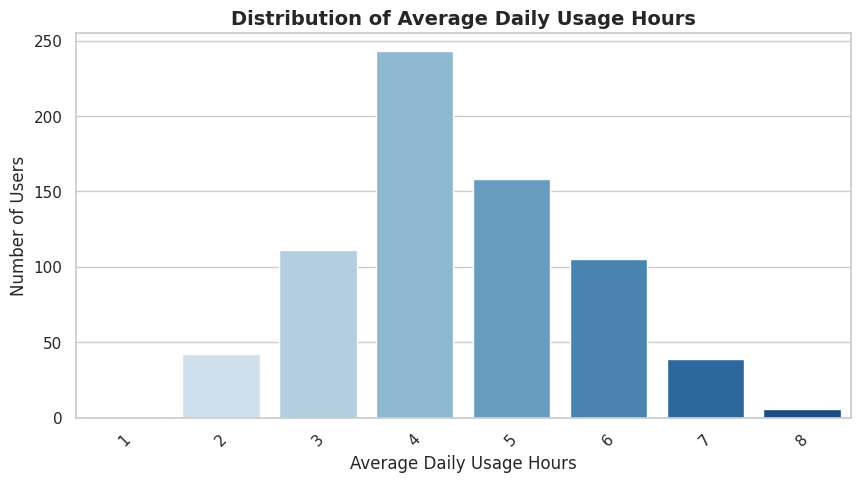

In [222]:
# Distribution of Average Daily Usage Hours

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(
    x='Avg_Daily_Usage_Hours',
    data=df,
    palette='Blues'
)

plt.title('Distribution of Average Daily Usage Hours', fontsize=14, fontweight='bold')
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)

plt.show()


/tmp/ipython-input-1448882963.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


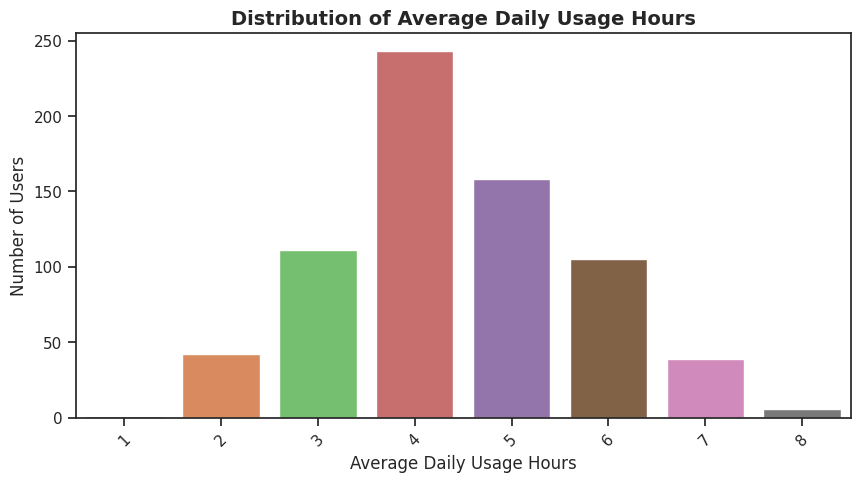

In [223]:
# Distribution of Average Daily Usage Hours

sns.set(style="ticks")
plt.figure(figsize=(10, 5))
sns.countplot(
    x='Avg_Daily_Usage_Hours',
    data=df,
    palette="muted"
)

plt.title('Distribution of Average Daily Usage Hours', fontsize=14, fontweight='bold')
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)

plt.show()


/tmp/ipython-input-672165485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


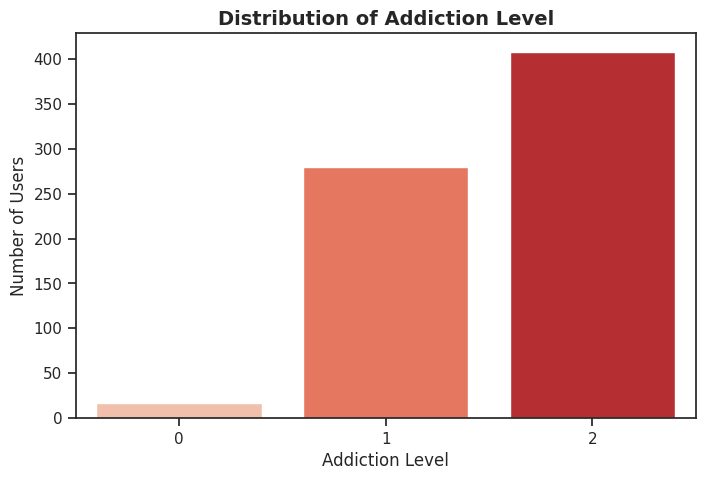

In [224]:
# Distribution of Addiction Level sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(
    x='Addiction_Level',
    data=df,
    palette='Reds'
)

plt.title('Distribution of Addiction Level', fontsize=14, fontweight='bold')
plt.xlabel('Addiction Level', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

plt.show()


## Bivariate Analysis

In [225]:
# Get platform counts from one-hot encoded columns
platform_counts = df.filter(like="Most_Used_Platform").sum().sort_values(ascending=False)

In [226]:
# Clean up column names (remove prefix for readability)
platform_counts.index = platform_counts.index.str.replace("Most_Used_Platform_", "")

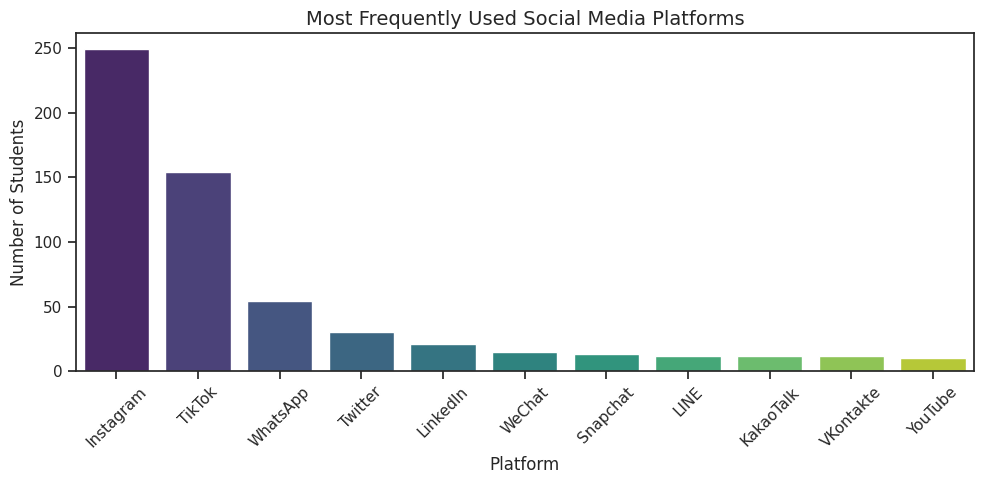

In [242]:
# Plot bar chart of platform usage

plt.figure(figsize=(10, 5))
sns.barplot(
    x=platform_counts.index,
    y=platform_counts.values,
    hue=platform_counts.index,
    palette="viridis"
)
plt.title("Most Frequently Used Social Media Platforms", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


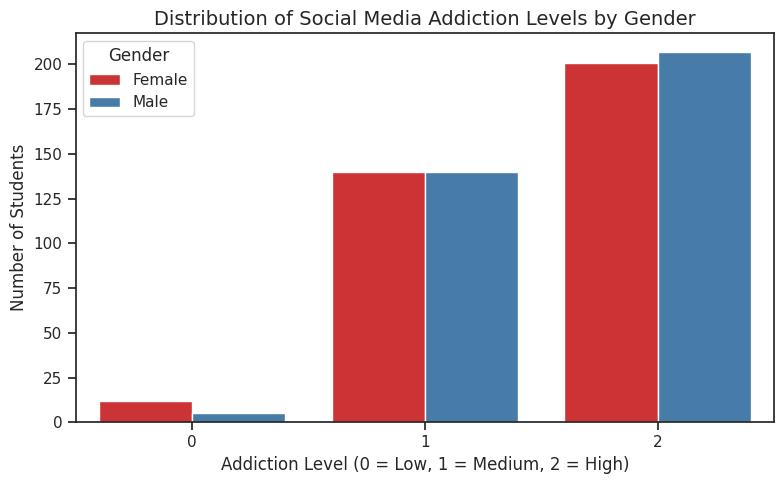

In [228]:
# Chart 1: Distribution of Social Media Addiction Levels by Gender

plt.figure(figsize=(8, 5))
sns.countplot(x='Addiction_Level', hue='Gender', data=df, palette="Set1")

# Add title and axis labels
plt.title('Distribution of Social Media Addiction Levels by Gender', fontsize=14)
plt.xlabel('Addiction Level (0 = Low, 1 = Medium, 2 = High)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Adjust legend labels (0 = Female, 1 = Male)
plt.legend(title="Gender", labels=["Female", "Male"])

plt.tight_layout()
plt.show()


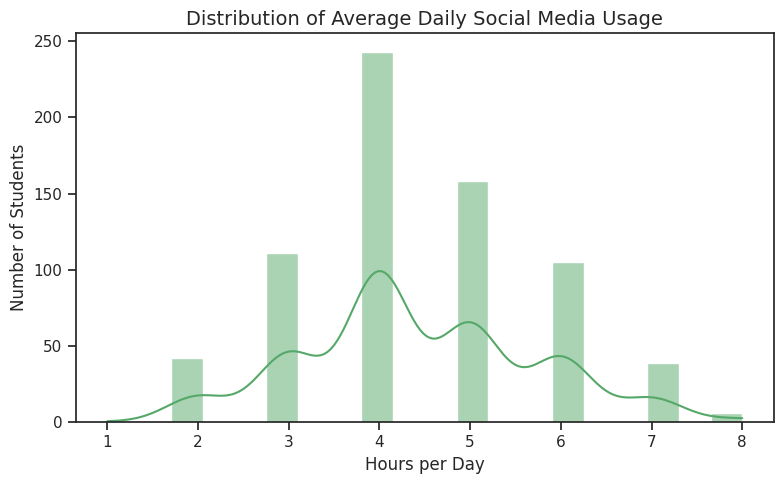

In [229]:
# Chart 2: Distribution of Average Daily Social Media Usage

plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Daily_Usage_Hours'], bins=20, kde=True, color="g")
plt.title('Distribution of Average Daily Social Media Usage', fontsize=14)
plt.xlabel('Hours per Day', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2138986507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


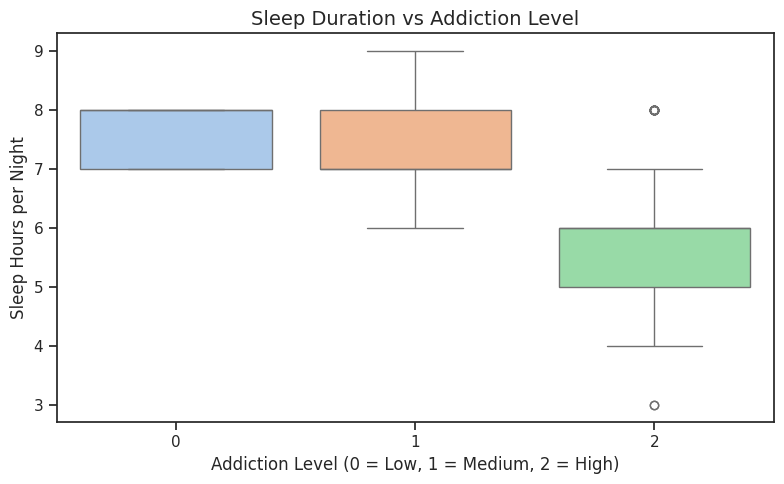

In [230]:
# Chart 3: Sleep Duration vs Addiction Level

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Addiction_Level',
    y='Sleep_Hours_Per_Night',
    data=df,
    palette="pastel"
)
plt.title('Sleep Duration vs Addiction Level', fontsize=14)
plt.xlabel('Addiction Level (0 = Low, 1 = Medium, 2 = High)', fontsize=12)
plt.ylabel('Sleep Hours per Night', fontsize=12)
plt.tight_layout()
plt.show()


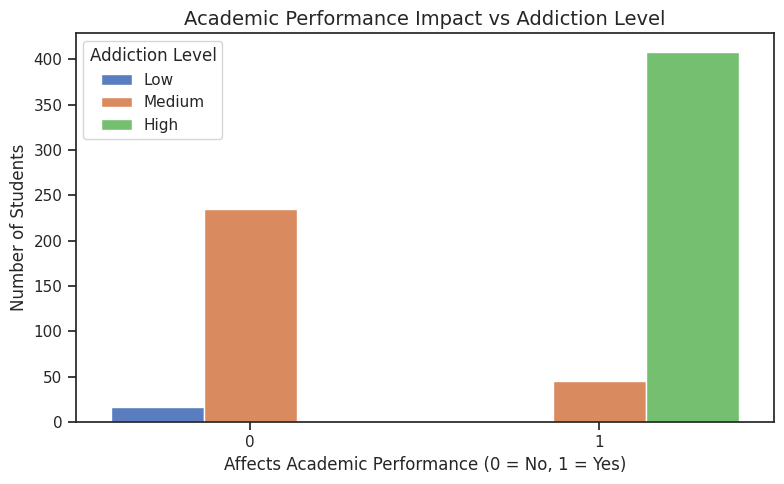

In [231]:
# Chart 4: Academic Performance Impact vs Addiction Level

plt.figure(figsize=(8, 5))
sns.countplot(x='Affects_Academic_Performance', hue='Addiction_Level', data=df, palette="muted")
plt.title('Academic Performance Impact vs Addiction Level', fontsize=14)
plt.xlabel('Affects Academic Performance (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(title="Addiction Level", labels=["Low", "Medium", "High"])
plt.tight_layout()
plt.show()


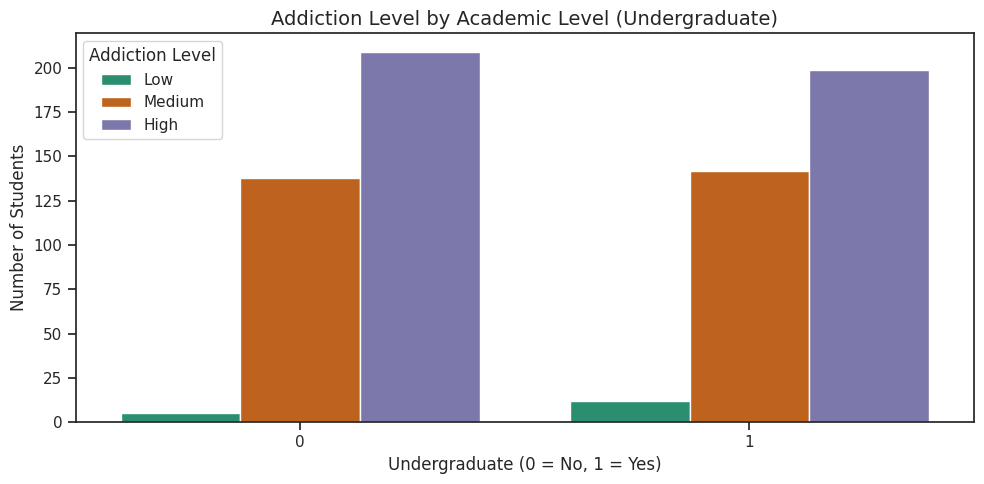

In [232]:
# Chart 5: Addiction Level by Academic Level (Undergraduate)

plt.figure(figsize=(10, 5))
sns.countplot(x='Academic_Level_Undergraduate', hue='Addiction_Level', data=df, palette="Dark2")
plt.title("Addiction Level by Academic Level (Undergraduate)", fontsize=14)
plt.xlabel("Undergraduate (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.legend(title="Addiction Level", labels=["Low", "Medium", "High"])
plt.tight_layout()
plt.show()


/tmp/ipython-input-899297962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


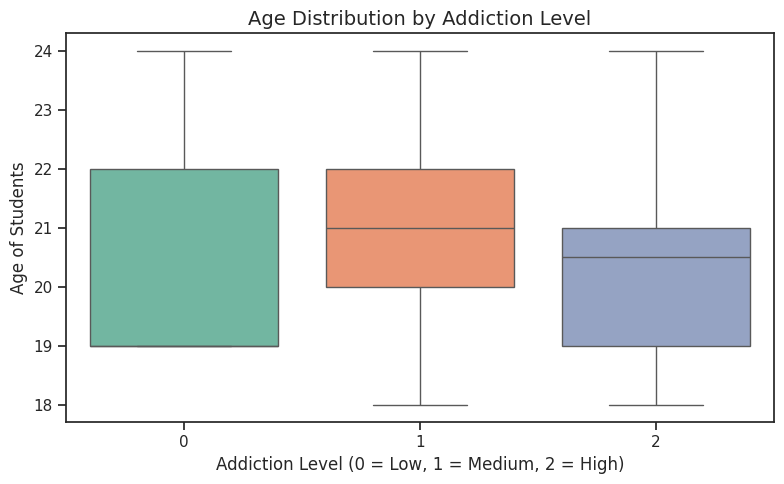

In [233]:
# Chart 6: Age vs Addiction Level

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Addiction_Level',
    y='Age',
    data=df,
    palette="Set2"
)

plt.title('Age Distribution by Addiction Level', fontsize=14)
plt.xlabel('Addiction Level (0 = Low, 1 = Medium, 2 = High)', fontsize=12)
plt.ylabel('Age of Students', fontsize=12)
plt.tight_layout()
plt.show()


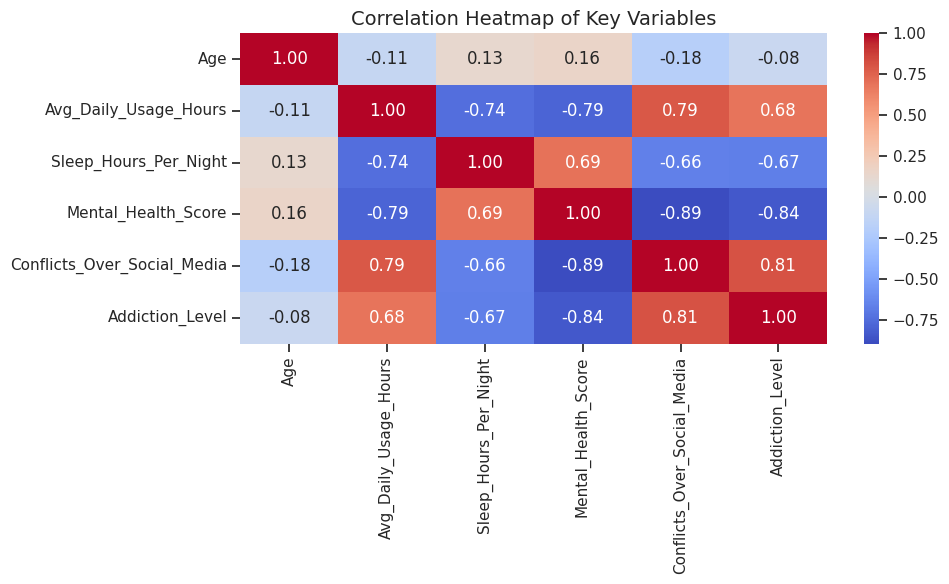

In [234]:
# Chart 7: Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(
    df[['Age','Avg_Daily_Usage_Hours','Sleep_Hours_Per_Night',
        'Mental_Health_Score','Conflicts_Over_Social_Media','Addiction_Level']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Correlation Heatmap of Key Variables', fontsize=14)
plt.tight_layout()
plt.show()


## Statistical Analysis

In [235]:
from scipy.stats import f_oneway, chi2_contingency

# ANOVA: Compare average daily usage hours across addiction levels
low = df[df['Addiction_Level'] == 0]['Avg_Daily_Usage_Hours']
medium = df[df['Addiction_Level'] == 1]['Avg_Daily_Usage_Hours']
high = df[df['Addiction_Level'] == 2]['Avg_Daily_Usage_Hours']

f_stat, p_value = f_oneway(low, medium, high)
print("ANOVA Test - Avg Daily Usage Hours by Addiction Level")
print("F-statistic:", f_stat)
print("p-value:", p_value)

ANOVA Test - Avg Daily Usage Hours by Addiction Level
F-statistic: 312.62118062421615
p-value: 8.105765727304411e-98


In [236]:
# Chi-square test: Relationship between Gender and Addiction Level
contingency = pd.crosstab(df['Gender'], df['Addiction_Level'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-square Test - Gender vs Addiction Level")
print("Chi2:", chi2, "p-value:", p)



Chi-square Test - Gender vs Addiction Level
Chi2: 2.9691757694740266 p-value: 0.2265957049852707


## Machine Learning Model (Logistic Regression)

In [262]:
# Get correlation with target
corr = df.corr()['Addiction_Level']

# Select features with strong correlation (absolute value > 0.5)
selected_features = corr[abs(corr) > 0.5].index.tolist()

# Remove target itself
selected_features.remove('Addiction_Level')

# Use selected features for X
X = df[selected_features]
y = df['Addiction_Level']

print("Selected features:", selected_features)

Selected features: ['Avg_Daily_Usage_Hours', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media']


In [263]:
# Step: Train/Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # ensures balanced class distribution
)

print("\nTrain/Test Split:")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Class distribution in training set:\n", y_train.value_counts())


Train/Test Split:
Training set shape: (564, 5)
Test set shape: (141, 5)
Class distribution in training set:
 Addiction_Level
2    326
1    224
0     14
Name: count, dtype: int64


In [265]:
# Step: Logistic Regression Model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # handles class imbalance
    multi_class='auto'
)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lr = log_reg.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Model Evaluation


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         3
           1       1.00      0.86      0.92        56
           2       0.98      1.00      0.99        82

    accuracy                           0.94       141
   macro avg       0.77      0.95      0.80       141
weighted avg       0.97      0.94      0.95       141

Accuracy: 0.9432624113475178



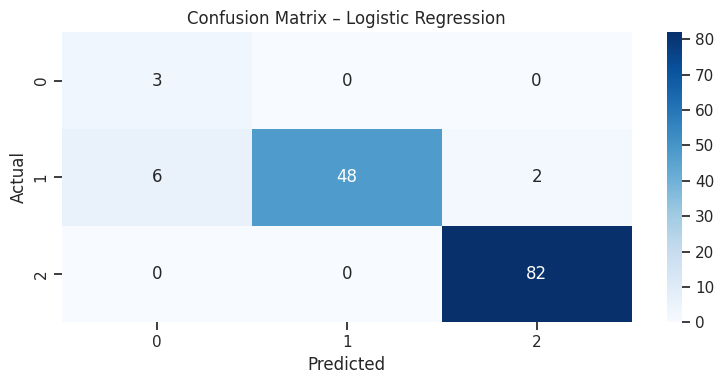

In [274]:
# Step: Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("\nLogistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

print("="*30,"\n")

# Confusion Matrix Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_lr),
    annot=True, fmt='d', cmap='Blues'
)
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## Conclusion

In this project, exploratory data analysis and machine learning were used to examine patterns of social media addiction. Univariate and bivariate analyses identified key behavioral factors influencing addiction levels. Predictive models were trained, with Logistic Regression outperforming baseline approaches. Results indicate that features such as daily usage time and sleep duration are strong predictors of addiction, demonstrating the effectiveness of data-driven methods in modeling real-world behavioral issues.